# Credit Portfolio Analysis
### Joey Nguyen
#### Credit Score Classification Dataset: https://www.kaggle.com/datasets/parisrohan/credit-score-classification/discussion/data?sort=undefined

In [56]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

# Load Credit Score Classification dataset into a DataFrame
df = pd.read_csv('/Users/joeynguyen/Downloads/test.csv')

# Print first 10 rows of data
df.head(11)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.68014533363515,High_spent_Large_value_payments,452.30230675990265
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,NaN,1,...,3.0,Good,1303.01,35.229707,18 Years and 5 Months,No,246.992319,397.50365354404653,Low_spent_Medium_value_payments,854.2260270022115
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528


## Deliverable II

### Read the Data's Schema
##### ID: Represents a unique identification of an entry
##### Customer_ID: Represents a unique identification of a person
##### Month: Represents the month of the year
##### Name: Represents the name of a person
##### Age: Represents the age of the person
##### SSN: Represents the social security number of a person
##### Occupation: Represents the occupation of the person
##### Annual_Income: Represents the annual income of the person
##### Monthly_Inhand_Salary: Represents the monthly base salary of a person
##### Num_Bank_Accounts: Represents the number of bank accounts a person holds
##### Num_Credit_Card: Represents the number of other credit cards held by a person
##### Interest_Rate: Represents the interest rate on credit card
##### Num_of_Loan: Represents the number of loans taken from the bank
##### Type_of_Loan: Represents the type of loan taken by a person
##### Delay_from_due_date: Represents the average number of days delayed from the payment date
##### Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
##### Changed_Credit_Limit: Represents the percentage change in credit card limit
##### Num_Credit_Inquiries: Represents the number of credit card inquiries
##### Credit_Mix: Represents the classification of the mix of credits 
##### Outstanding_Debt: Represents the remaining debt to be paid (in USD)
##### Credit_Utilization_Ratio: Represents the utilization ratio of credit card
##### Credit_History_Age: Represents the age of credit history of the person
##### Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
##### Total_EMI_per_month: Represents the monthly EMI payments (in USD)
##### Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
##### Payment_Behavior: Represents the payment behavior of the customer (in USD)
##### Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

### Calculate Data Size

In [57]:
# Define a constant for megabytes (MB)
MB = 2**20

# Calculate the total memory usage of the DataFrame
# 'deep=True' accounts for the full memory
# Divide by MB to convert bytes into megabytes
print(f"Memory usage (MB): {df.memory_usage(deep=True).sum()/MB}")

Memory usage (MB): 57.80892276763916


### Look at the Raw Data

In [58]:
# Loop through first few columns of the original DataFrame
# enumerate() adds an index so it stops printing after a few entries
print('First 4 column names: ')
for i, line in enumerate(df):
    print(line.strip()) # Remove any whitespace before printing
    # Stops after the first 4 rows
    if i == 3: 
        break 

# Import pprint for neatly formatted printing
from pprint import pprint
import csv

print('\nFirst 4 rows of original dataset: ')
# Open the CSV file in read mode
with open('/Users/joeynguyen/Downloads/test.csv', 'r') as fp:
    # Create a DictReader to read rows as dictionaries 
    rdr = csv.DictReader(fp)
    # Look through the first few rows and pretty-print them
    for i, row in enumerate(rdr):
       # pprint() displays the dictionary with clear formatting and keeps the key order the same
        pprint(row, sort_dicts=False)
        # Stop after printing the first 4 rows
        if i == 3: 
            break

First 4 column names: 
ID
Customer_ID
Month
Name

First 4 rows of original dataset: 
{'ID': '0x160a',
 'Customer_ID': 'CUS_0xd40',
 'Month': 'September',
 'Name': 'Aaron Maashoh',
 'Age': '23',
 'SSN': '821-00-0265',
 'Occupation': 'Scientist',
 'Annual_Income': '19114.12',
 'Monthly_Inhand_Salary': '1824.8433333333328',
 'Num_Bank_Accounts': '3',
 'Num_Credit_Card': '4',
 'Interest_Rate': '3',
 'Num_of_Loan': '4',
 'Type_of_Loan': 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home '
                 'Equity Loan',
 'Delay_from_due_date': '3',
 'Num_of_Delayed_Payment': '7',
 'Changed_Credit_Limit': '11.27',
 'Num_Credit_Inquiries': '2022.0',
 'Credit_Mix': 'Good',
 'Outstanding_Debt': '809.98',
 'Credit_Utilization_Ratio': '35.03040185583525',
 'Credit_History_Age': '22 Years and 9 Months',
 'Payment_of_Min_Amount': 'No',
 'Total_EMI_per_month': '49.57494921489417',
 'Amount_invested_monthly': '236.64268203272135',
 'Payment_Behaviour': 'Low_spent_Small_value_payments',
 'Monthl

### Check Data Types

In [59]:
# Display the data types of each column
# Verifies which columns are numeric, categorical, or object types
print('Data Types:')
df.dtypes

Data Types:


ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object

### Fixing Types
#### pd.to_numeric() converts columns to numeric types (floats). This function is useful when dealing with non-numeric values. The astype() method can also be used, but errors occur if any value in the column is not the data type that the column is being changed to. For example, an error will occur if astype(float) is used and there is a value '62_' in the column because the value is an object and not a float.
##### Annual_Income: object -> float 64
##### Num_of_Loan: object -> float64
##### Num_of_Delayed_Payment: object -> float64
##### Changed_Credit_Limit: object -> float64
##### Outstanding_Debt: object -> float64
##### Credit_History_Age: object -> float64
##### Payment_of_Min_Amount: object -> float64
##### Amount_invested_monthly: object -> float64
##### Monthly_Balance: object -> float64

In [60]:
# Create list with columns that need to be fixed
cols1 = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]

# Convert columns to numeric types
df[cols1] = df[cols1].apply(pd.to_numeric, errors = 'coerce')

# Print revised data types
print("Revised Data Types:")
df.dtypes

Revised Data Types:


ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
dtype: object

### Look For Bad Data
##### Based on the dataset's summary statistics, potential issues with the data became apparent.
##### 1. Monthly_Inhand_Salary: Could be outliers (some extremely high salaries can inflate the mean); unrealistically low values - 303 seems low (maybe part-time salary or data entry error)
##### 2. Num_Bank_Accounts: Negative value (can't have negative bank accounts); unrealistic max (unrealistic to have 1,798 bank accounts)
##### 3. Num_Credit_Card: Unrealistic max (impossible to have 1,499 credit cards) - could be data entry error or column misalignment (?)
##### 4. Interest_Rate: 5,799% interest rate is unrealistic; very high variance (indicate outliers)
##### 5. Delay_from_due_date: Negative delays (can't delay a payment before it is due)
##### 6. Num_Credit_Inquiries: Missing data; unrealistic max (2,593 is highly unlikely)
##### 7. Total_EMI_per_month: Extreme outliers (mean < std), loan of 82,398 seems unrealistic relative to salary (Max salary = 15,204)

In [61]:
# Get summary statistics for all numeric columns in the DataFrame
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,47523.000000,4.648000e+04,42502.000000,50000.000000,50000.000000,50000.000000,47564.000000,50000.000000,45075.000000,48941.000000,48965.000000,49509.000000,50000.000000,50000.000000,45554.000000,49432.000000
mean,110.120994,1.651169e+05,4182.004291,16.838260,22.921480,68.772640,3.267787,21.052640,30.744737,10.374844,30.080200,1425.488588,32.279581,1491.304305,194.835617,403.066257
std,682.295531,1.341967e+06,3174.109304,116.396848,129.314804,451.602363,67.139627,14.860397,220.188421,6.780628,196.984121,1155.312552,5.106238,8595.647887,196.654604,213.685108
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.450000,0.000000,0.230000,20.509652,0.000000,0.000000,0.103402
25%,25.000000,1.943560e+04,1625.188333,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.340000,4.000000,565.340000,28.061040,32.222388,72.212975,270.498156
50%,34.000000,3.757587e+04,3086.305000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,7.000000,1164.470000,32.280390,74.733349,129.032119,336.984582
75%,43.000000,7.276004e+04,5934.189094,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.800000,10.000000,1943.210000,36.468591,176.157491,236.867011,470.867640
max,8688.000000,2.413726e+07,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,4399.000000,36.650000,2593.000000,4998.070000,48.540663,82398.000000,1908.124400,1606.518192


#### Missing Values
##### Some columns have a high number of missing values because the data type for those columns changed from an object to a float. The data for those columns need to be numeric, but errors in the data entry made the data an object. Changing those values into a float turned the data into null values, explaining the high number of missing values in those columns. To resolve this, the data needs to be cleaned.

In [62]:
# Check for missing data
print(df.isna().sum())

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                         2477
SSN                            0
Occupation                     0
Annual_Income               3520
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                 2436
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      4925
Changed_Credit_Limit        1059
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt             491
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4446
Payment_Behaviour              0
Monthly_Balance              568
dtype: int64


#### Histogram for Distributions
##### To detect skewness and outliers
##### 1. The distribution of Monthly_Inhand_Salary doesn't have many outliers, and there could be a lot of reasons why the range and mean are such large values.
##### 2. The distribution of Delay_from_due_date doesn't have many outliers. The only problem with the data is that it contains negative values.

<Axes: title={'center': 'Distribution of Monthly_Inhand_Salary'}, ylabel='Frequency'>

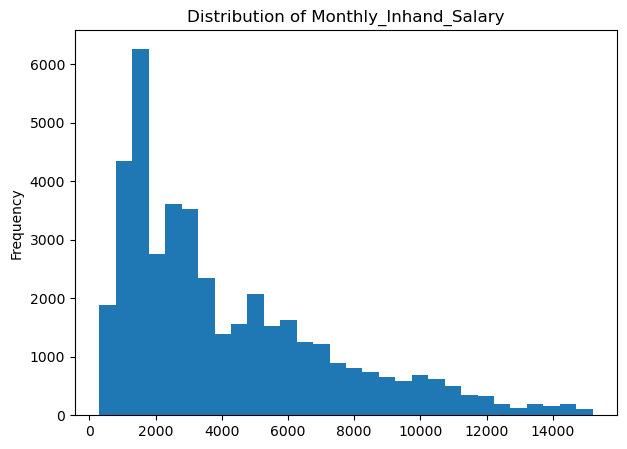

In [63]:
# Histogram to visualize distribution of Monthly_Inhand_Salary
df['Monthly_Inhand_Salary'].plot.hist(bins = 30, title = 'Distribution of Monthly_Inhand_Salary', figsize = (7,5))

<Axes: title={'center': 'Distribution of Delay_from_due_date'}, ylabel='Frequency'>

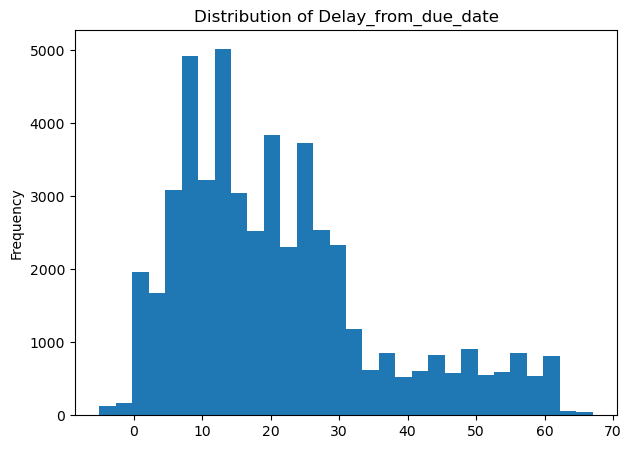

In [64]:
# Histogram to visualize distribution of Delay_from_due_date
df['Delay_from_due_date'].plot.hist(bins=30, title='Distribution of Delay_from_due_date', figsize=(7,5))

#### Boxplots to Spot Outliers
##### The boxplot makes it easy to spot outliers in each column. The points on the graph outside the IQR range indicate outliers. Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_Credit_Inquiries, and Total_EMI_per_month contain a significant amount of outliers.

<Axes: >

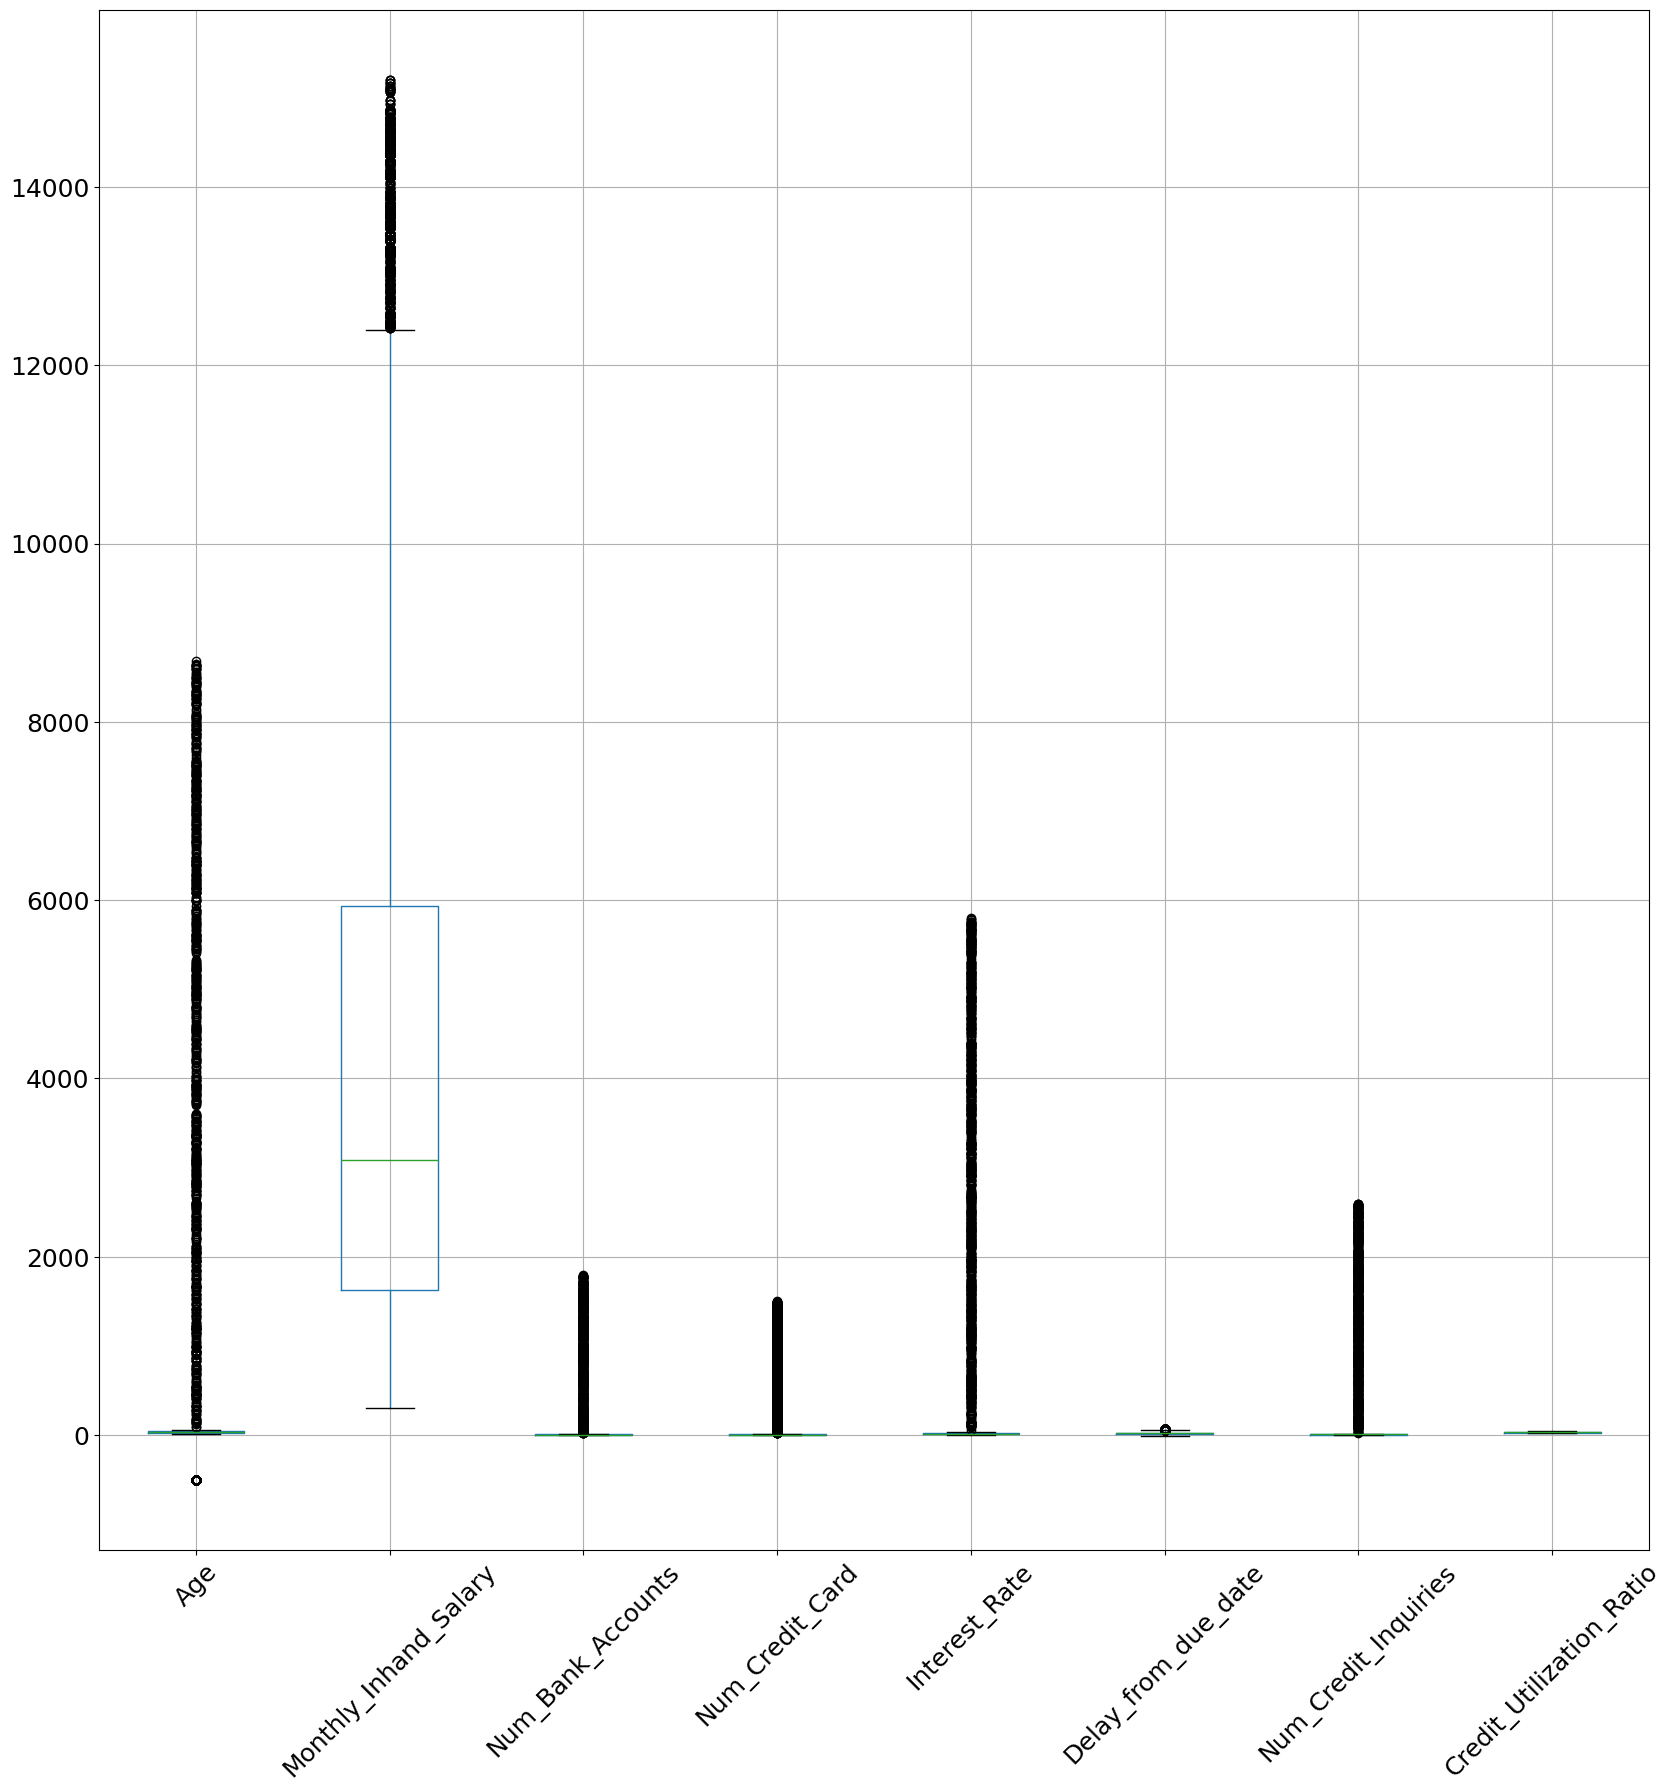

In [65]:
# Boxplot to visualize outliers in the data
# Create a list of numeric columns to visualize with boxplots
# List excludes Total_EMI_per_month because that column makes it hard to visualize the other columns
cols2 = [
    'Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card','Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries','Credit_Utilization_Ratio'
]

# Boxplot to visualize outliers in the data in numeric columns (Total_EMI_per_month on separate graph)
df.boxplot(column=cols2, rot=45, fontsize=18, figsize=(20,20))

<Axes: >

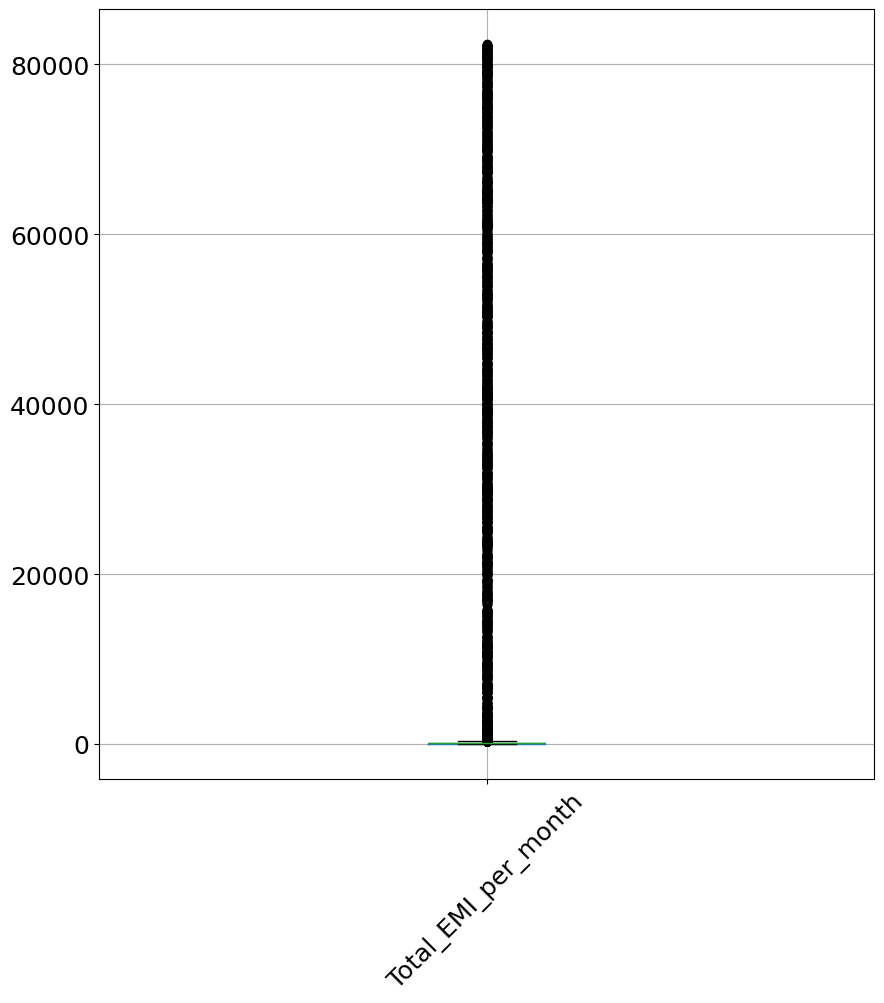

In [66]:
# Boxplot to visualize outliers in the data in Total_EMI_per_month
df.boxplot(column ='Total_EMI_per_month', rot=45, fontsize=18, figsize=(10,10))

### Check For Invalid Values
##### Checking for invalid values confirms any outliers in the data.

In [67]:
# Negative values check
print('Negative values')
print(f"\tNegative values in Age: {len(df[df['Age'] < 0])}")
print(f"\tNegative values in Num_Bank_Accounts: {len(df[df['Num_Bank_Accounts'] < 0])}")
print(f"\tNegative values in Delay_from_due_date: {len(df[df['Delay_from_due_date'] < 0])}")

# Unrealistically high value count
print('\nHigh values')
print(f"\tAge > 120: {len(df[df['Age'] > 120])}")
print(f"\tNum_Bank_Accounts > 50: {len(df[df['Num_Bank_Accounts'] > 50])}")
print(f"\tNum_Credit_Card > 50: {len(df[df['Num_Credit_Card'] > 50])}")
print(f"\tNum_Credit_Inquiries > 50: {len(df[df['Num_Credit_Inquiries'] > 50])}")

# Outlier ratio: EMI much larger than salary
print('\nOutlier ratio: EMI much larger than salary')
outliers = df[df['Total_EMI_per_month'] > df['Monthly_Inhand_Salary']]
print(outliers[['Monthly_Inhand_Salary', 'Total_EMI_per_month']].head())

Negative values
	Negative values in Age: 464
	Negative values in Num_Bank_Accounts: 16
	Negative values in Delay_from_due_date: 298

High values
	Age > 120: 894
	Num_Bank_Accounts > 50: 625
	Num_Credit_Card > 50: 1150
	Num_Credit_Inquiries > 50: 841

Outlier ratio: EMI much larger than salary
     Monthly_Inhand_Salary  Total_EMI_per_month
117            3007.461667              50770.0
161             853.824583              76196.0
211            1023.217588              77521.0
225            6866.692500              29462.0
383            5068.380000              73057.0


## Deliverable III

### Duplicate entries
##### The dataset does not contain duplicate entries, so consolidation or removal was not necessary.

In [68]:
# Check for duplicate entries
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


### Data Formatting
##### Ensure data types and formats are consistent and appropriate for imputation

#### Convert data types

In [69]:
# Convert data types
# Convert numeric-like text columns to numeric format
# Create list of all numeric columns
numeric_cols = [
    "Age", "Annual_Income", "Outstanding_Debt", "Changed_Credit_Limit",
    "Num_of_Delayed_Payment", "Amount_invested_monthly", "Monthly_Balance"
]

# Remove unwanted characters and convert data type from object to float
# Keep only digits, decimal points, and minus signs; remove everything else
# Empty strings replaced with NaN, and columns are converted to float
for col in numeric_cols:
    df[col] = (df[col].astype(str).str.replace(r"[^0-9.\-]", "", regex=True).replace("", np.nan).astype(float))

# Print first 10 rows to check for correct formatting
print(f"Converted columns to numeric types: {numeric_cols}")

# Print first 10 rows to check for correct formatting
print("\nPrinting first 10 rows to check for correct formatting...")
df.head(11)

Converted columns to numeric types: ['Age', 'Annual_Income', 'Outstanding_Debt', 'Changed_Credit_Limit', 'Num_of_Delayed_Payment', 'Amount_invested_monthly', 'Monthly_Balance']

Printing first 10 rows to check for correct formatting...


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,0x160d,CUS_0xd40,December,Aaron Maashoh,NaN,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28.0,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28.0,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.680145,High_spent_Large_value_payments,452.302307
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.534488,!@9#%8,421.447964
8,0x1622,CUS_0x2dbc,September,Langep,35.0,486-85-3974,Engineer,143162.64,NaN,1,...,3.0,Good,1303.01,35.229707,18 Years and 5 Months,No,246.992319,397.503654,Low_spent_Medium_value_payments,854.226027
9,0x1623,CUS_0x2dbc,October,Langep,35.0,486-85-3974,Engineer,143162.64,12187.220000,1,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.615131,Low_spent_Large_value_payments,788.114550


### Outliers
##### Handle extreme values that may affect imputation methods.

In [70]:
# Function to replace outliers with null values
def remove_outliers(df, col):
    # Establish IQR values
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    # Create lower and upper bounds to establish the range and highlight outliers
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count how many missing values are in the column before
    before = df[col].isna().sum()
    # Replace outliers with NaN; values in the range remain unchanged
    df[col] = np.where((df[col] < lower) | (df[col] > upper), np.nan, df[col])
    # Count how many missing values are in the column after
    after = df[col].isna().sum()
    # Display how many outliers were replaced with NaN
    print(f"{col}: {after-before} outliers replaced with NaN")

# Replace outliers in numeric columns with questionable data (extreme max values, negative values, etc.)
for col in ["Age", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Delay_from_due_date", "Num_Credit_Inquiries", "Total_EMI_per_month"]:
    remove_outliers(df,col)

# Print first 10 rows to check for correct formatting
print("\nPrinting first 10 rows to check for correct formatting...")
df.head(11)

Age: 1361 outliers replaced with NaN
Num_Bank_Accounts: 635 outliers replaced with NaN
Num_Credit_Card: 1179 outliers replaced with NaN
Interest_Rate: 966 outliers replaced with NaN
Delay_from_due_date: 1996 outliers replaced with NaN
Num_Credit_Inquiries: 846 outliers replaced with NaN
Total_EMI_per_month: 3933 outliers replaced with NaN

Printing first 10 rows to check for correct formatting...


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,NaN,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,0x160d,CUS_0xd40,December,Aaron Maashoh,NaN,821-00-0265,Scientist,19114.12,NaN,3.0,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28.0,004-07-5839,_______,34847.84,3037.986667,2.0,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28.0,#F%$D@*&8,Teacher,34847.84,3037.986667,2.0,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2.0,...,5.0,_,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.680145,High_spent_Large_value_payments,452.302307
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2.0,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.534488,!@9#%8,421.447964
8,0x1622,CUS_0x2dbc,September,Langep,35.0,486-85-3974,Engineer,143162.64,NaN,1.0,...,3.0,Good,1303.01,35.229707,18 Years and 5 Months,No,246.992319,397.503654,Low_spent_Medium_value_payments,854.226027
9,0x1623,CUS_0x2dbc,October,Langep,35.0,486-85-3974,Engineer,143162.64,12187.220000,1.0,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.615131,Low_spent_Large_value_payments,788.114550


##### Cleaned distributions: Columns with extreme values and outliers were cleaned. As a result, each column (except Total_EMI_per_month) does not contain outliers. Total_EMI_per_month contains significantly fewer outliers.

<Axes: >

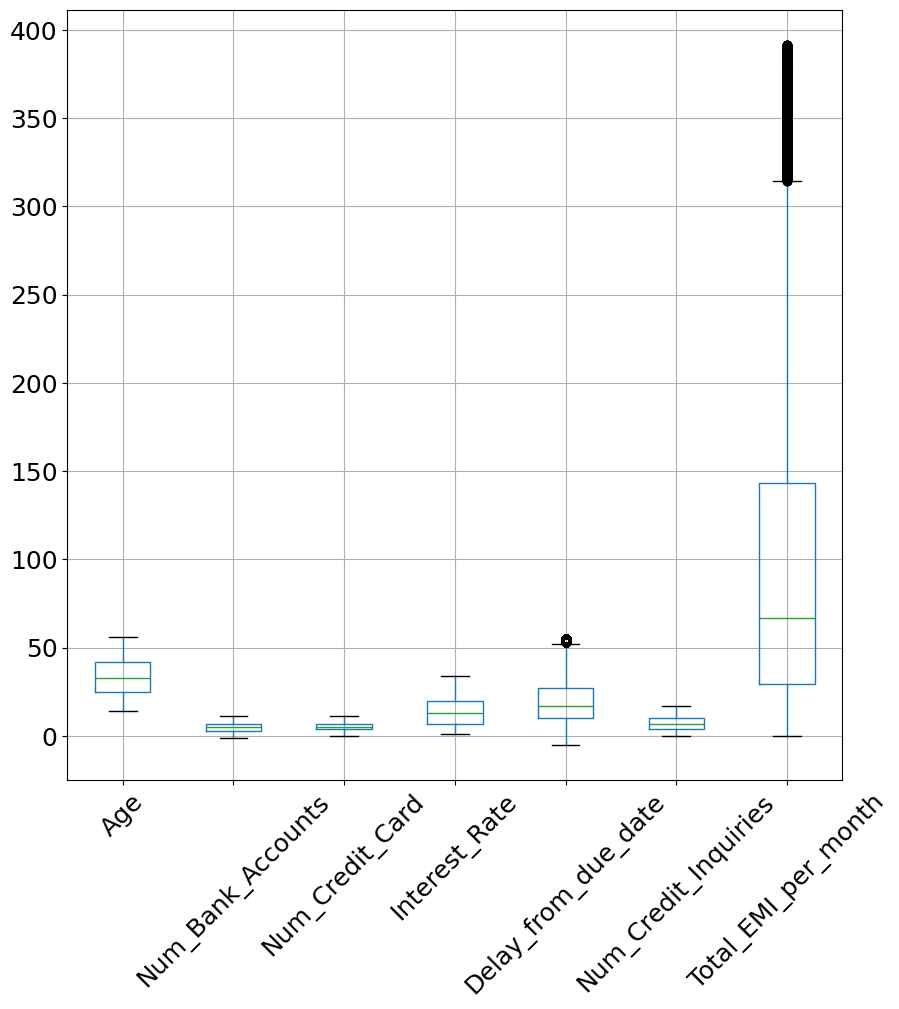

In [71]:
# List of columns without outliers and extreme values
cols3 = ["Age", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Delay_from_due_date", "Num_Credit_Inquiries", "Total_EMI_per_month"]

# Boxplot to show cleaned distributions
df.boxplot(column = cols3, rot=45, fontsize=18, figsize=(10,10))

## Deliverable IV

### Plot 1-3: Distribution of Annual Income
#### Plot Type: Histogram
##### The visualization includes three histograms to display the distribution of Annual Income. The annual income range is large, so dividing it into three plots helps visualize the data better. The visualization shows a large number of individuals with an annual income of less than 200,000 and greater than 1,000,000. This raised the question of whether there is a relationship between Age and Annual Income.

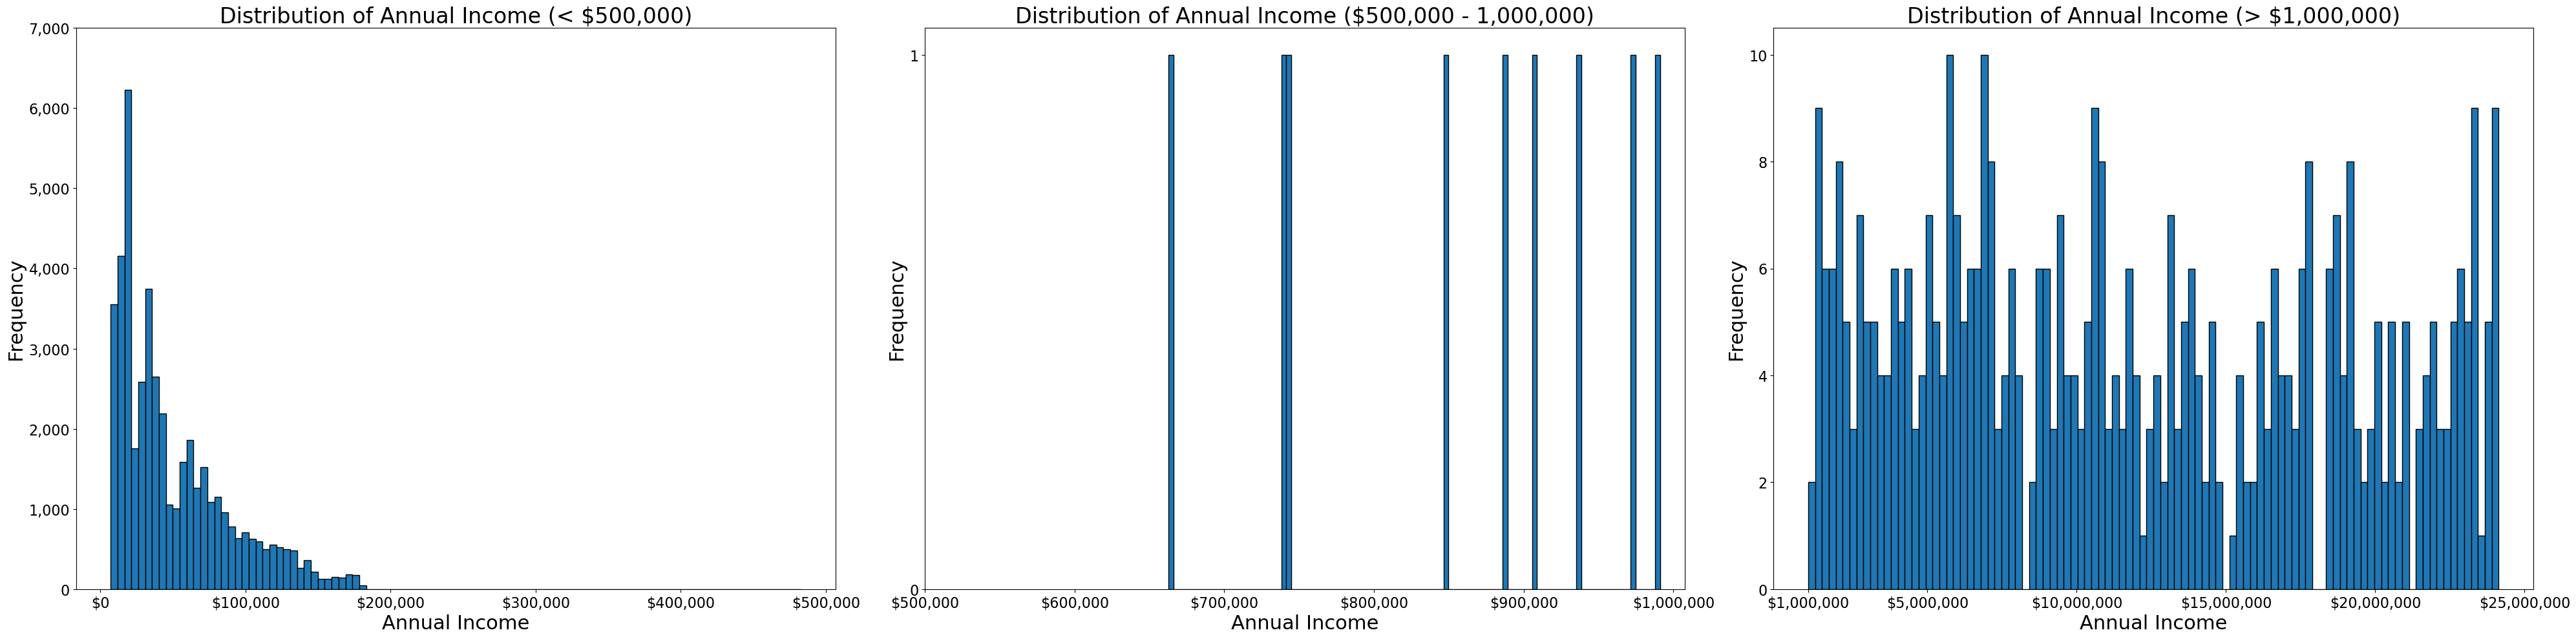

In [72]:
# Separate the DataFrame into three subsets based on the Annual_Income column
# Create three separate histograms

# Axes[0] - Annual_Income < $500,000
ai_under500k = df[df['Annual_Income']<500000]
# Axes[1] - Annual_Income $500,000 - $1,000,000
ai_500k_1m = df[(df['Annual_Income']>500000) & (df['Annual_Income']<1000000)]
# Axes[2] - Annual_Income > $1,000,000
ai_over1m = df[df['Annual_Income']>1000000]

# Create a figure and a set of subplots
# '1, 3' specifies 1 row and 3 columns for the subplots
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

# Plot first histogram - Annual_Income < $500,000
# 'bins=100' creates 100 bins
# 'edgecolor='black'' adds borders to the bars
axes[0].hist(ai_under500k['Annual_Income'], bins=100, edgecolor='black', density=False, orientation='vertical')

# Set title
axes[0].set_title('Distribution of Annual Income (< $500,000)', fontsize=24)

# Set tick parameters
axes[0].tick_params(axis='both', labelsize=16)

# Set x-axis labels and ticks
axes[0].set_xlabel('Annual Income', fontsize=22)
axes[0].set_xticks([0, 100000, 200000, 300000, 400000, 500000])
axes[0].set_xticklabels(['$0', '$100,000', '$200,000','$300,000','$400,000','$500,000'])

# Set y-axis ticks and labels
axes[0].set_ylabel('Frequency', fontsize=22)
axes[0].set_yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000])
axes[0].set_yticklabels(['0', '1,000', '2,000', '3,000', '4,000', '5,000', '6,000', '7,000'])


# Plot second histogram - Annual_Income $500,000 - $1,000,000
axes[1].hist(ai_500k_1m['Annual_Income'], bins=100, edgecolor='black', density=False, orientation='vertical')

# Set title
axes[1].set_title('Distribution of Annual Income ($500,000 - 1,000,000)', fontsize=24)

# Set tick parameters
axes[1].tick_params(axis='both', labelsize=16)

# Set x-axis labels and ticks
axes[1].set_xlabel('Annual Income', fontsize=22)
axes[1].set_xticks([500000, 600000, 700000, 800000, 900000, 1000000])
axes[1].set_xticklabels(['$500,000', '$600,000', '$700,000', '$800,000', '$900,000', '$1,000,000'])

# Set y-axis ticks and labels
axes[1].set_ylabel('Frequency', fontsize=22)
axes[1].set_yticks([0, 1])
axes[1].set_yticklabels(['0', '1'])


# Plot third histogram - - Annual_Income > $1,000,000
axes[2].hist(ai_over1m['Annual_Income'], bins=100, edgecolor='black', density=False, orientation='vertical')

# Set title
axes[2].set_title('Distribution of Annual Income (> $1,000,000)', fontsize=24)

# Set tick parameters
axes[2].tick_params(axis='both', labelsize=16)

# Set x-axis labels and ticks
axes[2].set_xlabel('Annual Income', fontsize=22)
axes[2].set_xticks([1000000, 5000000, 10000000, 15000000, 20000000, 25000000])
axes[2].set_xticklabels(['$1,000,000', '$5,000,000', '$10,000,000', '$15,000,000', '$20,000,000', '$25,000,000'])

# Set y-axis ticks and labels
axes[2].set_ylabel('Frequency', fontsize=22)


# Adjust subplot parameters for a tight layout
plt.tight_layout()
# Display the figure
plt.show()

### Plot 4: Relationship Between Age and Annual Income
#### Plot Type: Scatterplot
##### This scatterplot further analyzes the relationship between Age and Annual Income. In the plot, there are no visible trends, and all of the points on the plot are completely scattered. These findings confirm that there is no direct relationship between Age and Annual Income.

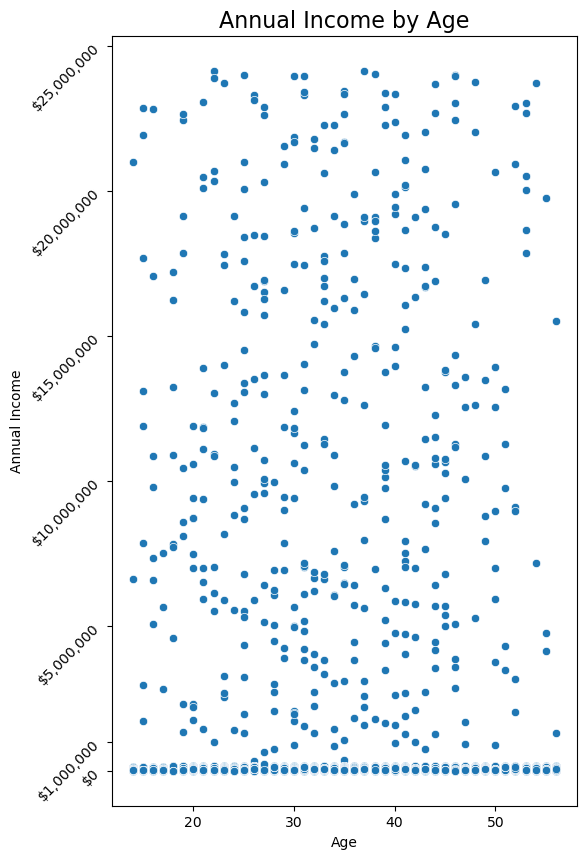

In [73]:
# Create a figure
plt.figure(figsize=(6,10))

# Generate a scatter plot
sns.scatterplot(data=df, x='Age', y='Annual_Income')

# Set title
plt.title('Annual Income by Age', fontsize=16)

# Set x-axis label
plt.xlabel('Age')

# Set y-axis label and ticks
plt.ylabel('Annual Income')
plt.yticks([0, 1000000, 5000000, 10000000, 15000000, 20000000, 25000000], 
           ['$0', '$1,000,000', '$5,000,000', '$10,000,000', '$15,000,000', '$20,000,000', '$25,000,000'],
          rotation=45)

# Display the figure
plt.show()

### Plot 5: Relationship Between Monthly Balance and Annual Income
#### Plot Type: Regression Plot
##### There is a heavy vertical cluster of data points on the far left (around the 0 income mark). This suggests that a large portion of the sample population has very low or zero annual income, while their monthly balance is spread across the full 0-800 range. The graph demonstrates a very weak, if any, linear correlation between Annual Income and Monthly Balance.

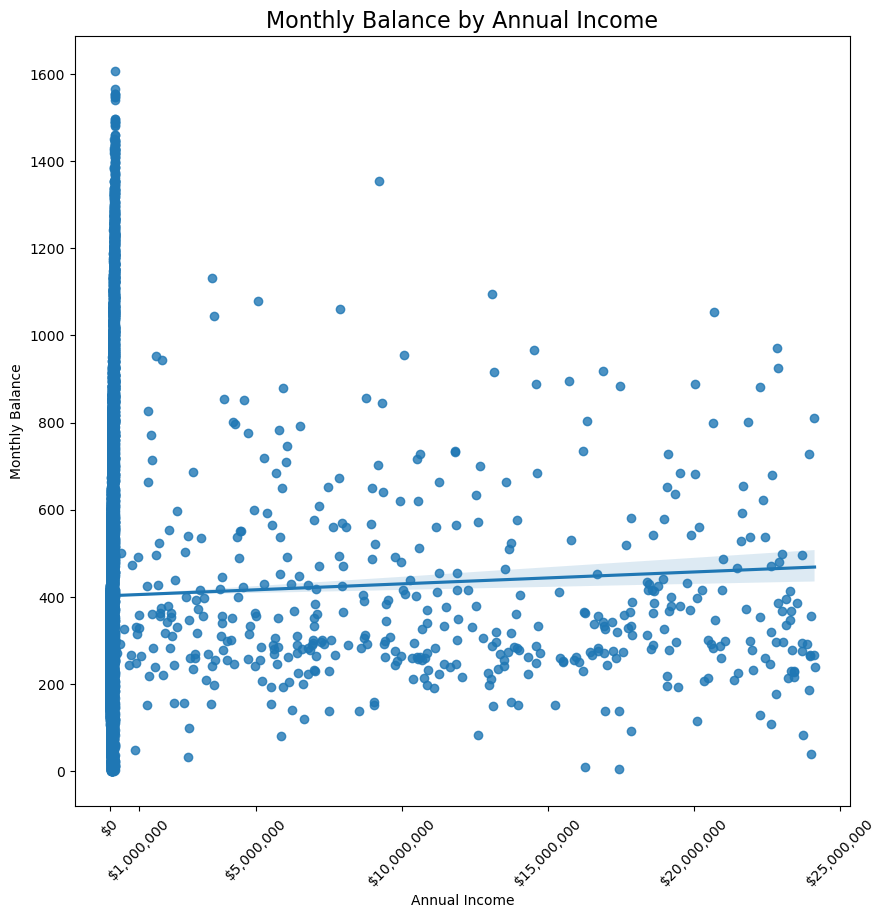

In [91]:
# Create a figure
plt.figure(figsize=(10,10))

# Generate a regression plot
sns.regplot(x='Annual_Income', y='Monthly_Balance', data=df)

# Set title
plt.title('Monthly Balance by Annual Income', fontsize=16)

# Set x-axis label and ticks
plt.xlabel('Annual Income')
plt.xticks([0, 1000000, 5000000, 10000000, 15000000, 20000000, 25000000], 
           ['$0', '$1,000,000', '$5,000,000', '$10,000,000', '$15,000,000', '$20,000,000', '$25,000,000'],
          rotation=45)

# Set y-axis label
plt.ylabel('Monthly Balance')

# Display the figure
plt.show()

### Plot 6: Relationship Between Monthly Balance and Age
#### Plot Type: Regression Plot
##### The predicted Monthly Balance ranges from about 330 to 390. At age 15, the predicted Monthly Balance is approximately 330. At age 55, the predicted Monthly Balance is approximately 390. This represents an increase of about $60 in the Monthly Balance over a 40-year period (from age 15 to 55). In summary, this graph shows a strong positive linear correlation where the Monthly Balance increases modestly but consistently with Age.

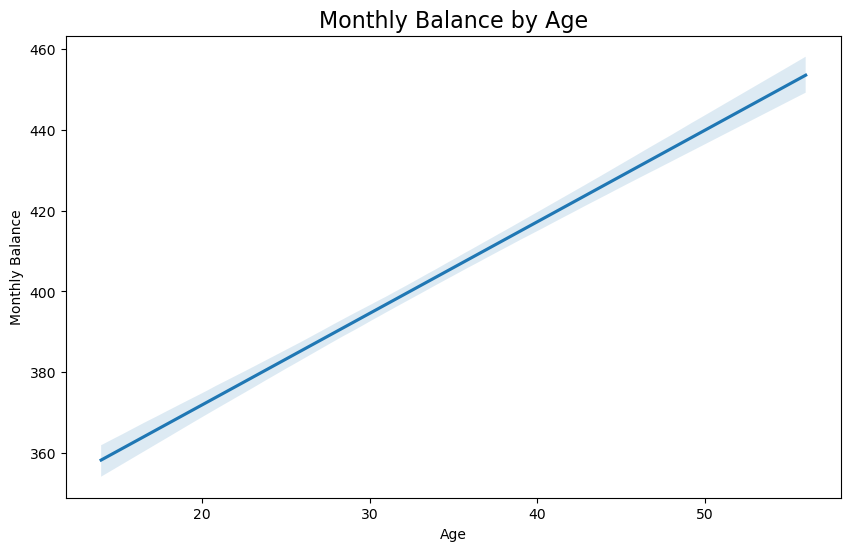

In [75]:
# Create a figure
plt.figure(figsize=(10,6))

# Generate a regression plot
# scatter=False removed the scatterplot 
# Scatterplot removed to better visualize regression line
sns.regplot(x='Age', y='Monthly_Balance', data=df, scatter=False)

# Set title
plt.title('Monthly Balance by Age', fontsize=16)

# Set x-axis label
plt.xlabel('Age')

# Set y-axis label
plt.ylabel('Monthly Balance')

# Display the figure
plt.show()

### Summary of Findings
#### The analysis of the dataset, which includes visualizations of Annual Income, Age, and Monthly Balance, reveals several key findings concerning data distribution, patterns, and variable relationships. The distribution of Annual Income is highly concentrated, with a significant number of individuals falling into the very low (less than 200,000) and very high (greater than 1,000,000) income brackets. Examining the relationship between Age and Annual Income shows no direct linear relationship, as the scatter plot of these variables appears completely scattered with no discernible trend. Conversely, the relationship between Annual Income and Monthly Balance exhibits a very weak, or nearly non-existent, linear correlation. This finding is supported by a nearly flat regression line, despite a notable outlier pattern where a large cluster of individuals with 0 income possesses a Monthly Balance spread across the full 0 to 800 range. In contrast to income, Age demonstrates a strong positive linear correlation with Monthly Balance. The findings reveal that financial stability (Monthly Balance) is more closely tied to Age than to Annual Income

## Deliverable V

## Income Groups

In [76]:
# Create Income Group Category
# Calculate the median value of 'Annual Income' (37576)
# Median is used as the threshold to divide the population into two income groups
income_threshold = df["Annual_Income"].median()

# Create a new categorical column in the DataFrame
# .apply(lambda x: ...) function is used to iterate through each value (x) in the 'Annual Income' column
# If 'Annual_Income' is below the threshold, then it is assigned to 'Lower Income' otherwise it is assigned to 'Higher Income'
df["Income_Group"] = df ["Annual_Income"].apply(lambda x: "Lower Income (<$37,576)" if x < income_threshold else "Higher Income (>$37,576)")

### Credit Utilization Ratio by Income Group
#### Technique: Perform group operations (Apply)
#### Plot: Boxplot
##### The descriptive statistics and boxplot illustrate the distribution of Credit Utilization Ratio across two income groups: Higher Income and Lower Income. The Higher Income group has a slightly higher mean Credit Utilization Ratio (32.74%) compared to the Lower Income group (31.75%). In the boxplot, the Higher Income group is positioned higher and is slightly wider, but the Lower Income group's whiskers (representing the full data range excluding outliers) extend further in both directions, indicating a greater overall spread of data values, particularly towards the lower end (minimum is lower for Lower Income).

In [77]:
# Group the DataFrame by 'Income_Group' and compute descriptive statistics for the 'Credit_Utilization_Ratio' within each group
df.groupby('Income_Group')["Credit_Utilization_Ratio"].describe()

,count,mean,std,min,25%,50%,75%,max
Income_Group,,,,,,,,
"Higher Income (>$37,576)",26760.0,32.737188,5.194232,20.509652,28.488784,32.692735,36.937253,48.540663
"Lower Income (<$37,576)",23240.0,31.752664,4.950992,21.545092,27.533915,31.789993,35.961773,42.395895


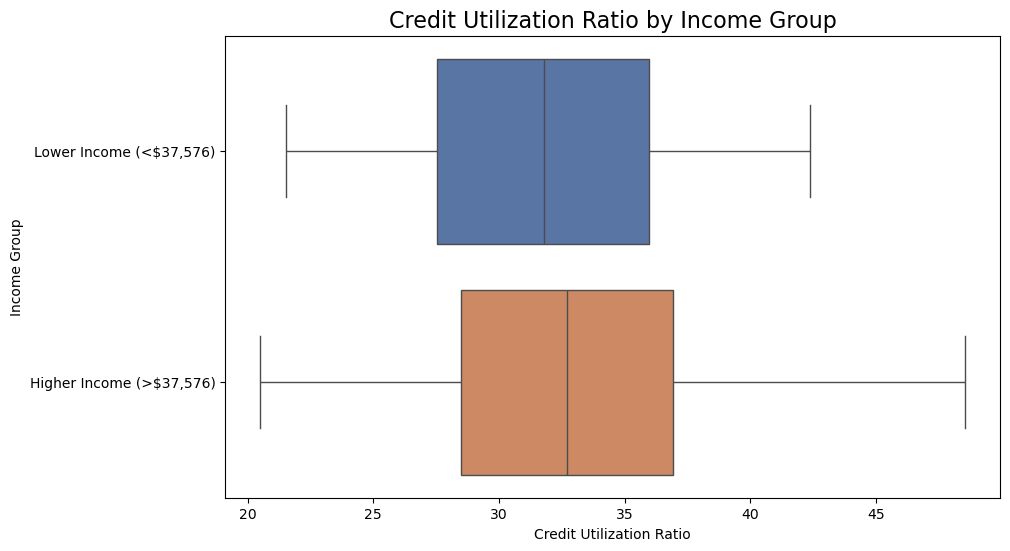

In [78]:
# Create a figure
plt.figure(figsize=(10,6))

# Generate a boxplot
sns.boxplot(data=df, x="Credit_Utilization_Ratio", y="Income_Group", hue='Income_Group', orient='h', palette=["#4C72B0", "#DD8452"], dodge=False, legend=False)

# Set title
plt.title("Credit Utilization Ratio by Income Group", fontsize=16)

# Set x-axis label
plt.xlabel("Credit Utilization Ratio")

# Set y-axis label
plt.ylabel("Income Group")

# Display the figure
plt.show()

### Occupation and Income Group
#### Technique: Perform group operations (Apply)
##### The analysis of occupation categorized by Income Group reveals that, for the listed professions, individuals in the Higher Income group generally outnumber those in the Lower Income group across most categories. High-skill or specialized roles like Engineer (1,773), Architect (1,742), Accountant (1,735), and Scientist (1,720) exhibit a notable concentration in the Higher Income bracket. Conversely, only a few occupations, most clearly Journalist (1,523 in Lower Income vs. 1,514 in Higher Income), show a slightly higher count in the Lower Income group. While the Lower Income counts for occupations like Teacher (1,519) and Lawyer (1,595) are significant, the corresponding Higher Income counts remain slightly greater, indicating a complex distribution where even in typically professional fields, a substantial population falls into the Lower Income category, but the financial advantage rests more frequently with the Higher Income group across the majority of the tracked occupations.

In [79]:
# Group the DataFrame by 'Income_Group' and compute descriptive statistics for the 'Occupation' within each group
df.groupby(["Occupation", 'Income_Group']).size().unstack()

Income_Group,"Higher Income (>$37,576)","Lower Income (<$37,576)"
Occupation,,
Accountant,1735,1398
Architect,1742,1453
Developer,1656,1490
Doctor,1564,1463
Engineer,1773,1439
Entrepreneur,1673,1430
Journalist,1514,1523
Lawyer,1729,1595
Manager,1635,1365


### Monthly Balance by Income Group
#### Technique: Perform group operations (Apply)
#### Plot: Boxplot
##### The analysis comparing Monthly Balance between the two income groups reveals a disparity. The Higher Income group maintains a significantly larger Monthly Balance, with a mean of 494.56 and a median (50%) of 451.21, in contrast to the Lower Income group's mean of 299.91 and a median of 294.10. Furthermore, the distribution for the Higher Income group is much wider, with a standard deviation of 314.12 compared to 67.84 for the Lower Income group This large spread in the Higher Income data is visually confirmed by the boxplot, where the box and the right whisker are substantially longer, indicating a large number of individuals with very high Monthly Balances, including several potential outliers extending up to the maximum of 1606.52. Conversely, the Lower Income group's distribution is much tighter and clustered around its lower mean, with a maximum value of only $542.25, clearly demonstrating a financial divide where Higher Income individuals not only hold more balance on average but also exhibit greater variability and extreme high values in their monthly savings.

In [80]:
# Group the DataFrame by 'Income_Group' and compute descriptive statistics for the 'Monthly_Balance' within each group
df.groupby('Income_Group')["Monthly_Balance"].describe()

,count,mean,std,min,25%,50%,75%,max
Income_Group,,,,,,,,
"Higher Income (>$37,576)",26196.0,494.562145,253.520628,0.103402,314.123372,451.205608,636.526936,1606.518192
"Lower Income (<$37,576)",23236.0,299.914842,67.837446,3.006394,257.265577,294.102234,340.468372,542.252646


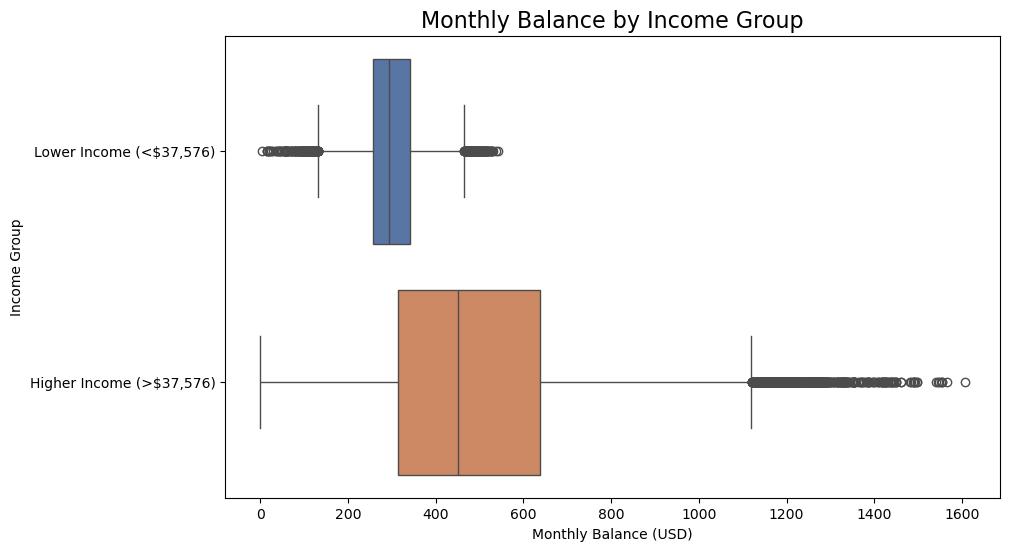

In [81]:
# Create the plot
plt.figure(figsize=(10,6))

# Generate a boxplot
sns.boxplot(x="Monthly_Balance", y="Income_Group", hue="Income_Group", data=df, orient='h', palette=["#4C72B0","#DD8452"], dodge=False, legend=False)

# Set title
plt.title("Monthly Balance by Income Group", fontsize=16) 

# Set x-axis label
plt.xlabel("Monthly Balance (USD)")

# Set y-axis label
plt.ylabel("Income Group")

# Display the plot
plt.show()

## Age Groups
#### Technique: Perform grouping operations (Apply) 
##### The analysis shows the overall count of individuals segmented into four age groups: Teen, Young Adult, Adult, and Middle-Aged Adult. This distribution suggests that the dataset is predominantly composed of individuals in the prime working-age category, specifically the Adult group.

In [82]:
# Age Range: 14-56
# Teen: 14-18
# Young Adult: 19-25
# Adult: 26-44
# Middle-Aged Adult: 45-56

bins = [13, 18, 25, 44, 56]
labels = ['Teen (14-18)', 'Young Adult (19-25)', 'Adult (26-44)', 'Middle-Aged Adult (45-56)']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [83]:
# Group the DataFrame by 'Age_Group' and compute descriptive statistics for the 'Age' within each group
df.groupby('Age_Group')['Age'].count()

/var/folders/jr/9ph4ptcn3n9c32zj55z_4whh0000gn/T/ipykernel_81733/3103404502.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Age'].count()


Age_Group
Teen (14-18)                  3172
Young Adult (19-25)           9189
Adult (26-44)                25324
Middle-Aged Adult (45-56)     8477
Name: Age, dtype: int64

### Income Categories In Age Groups
#### Technique: Perform group operations (Apply)
##### The analysis breaks down the Higher Income and Lower Income groups across the four age categories, revealing how income status is distributed with age. In the Teen group, there are more individuals in the Lower Income category (1,704) than the Higher Income category (1,468). The trend shifts with the Young Adult group, where the Higher Income count (4,989) significantly surpasses the Lower Income count (4,200). This dominance of Higher Income individuals is even more pronounced in the Adult group, which has the largest counts overall: 13,271 in the Higher Income group compared to 12,053 in the Lower Income group. Finally, the Middle-Aged Adult group continues this trend, with more individuals in the Higher Income bracket (4,994) than the Lower Income bracket (3,483). Overall, these findings suggest that while younger individuals (Teens) are more likely to be classified as Lower Income, the proportion of individuals in the Higher Income bracket tends to increase and dominate as they move into Young Adult, Adult, and Middle-Aged Adult categories.

In [84]:
# Group the DataFrame by 'Age_Group' and compute descriptive statistics for the 'Income_Group' within each group
df.groupby(["Age_Group", 'Income_Group']).size().unstack()

/var/folders/jr/9ph4ptcn3n9c32zj55z_4whh0000gn/T/ipykernel_81733/2159500577.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Age_Group", 'Income_Group']).size().unstack()


Income_Group,"Higher Income (>$37,576)","Lower Income (<$37,576)"
Age_Group,,
Teen (14-18),1468,1704
Young Adult (19-25),4989,4200
Adult (26-44),13271,12053
Middle-Aged Adult (45-56),4994,3483


### Credit Utilization Ratio by Age Group
#### Plot: Boxplot
##### The analysis reveals several key relationships between demographics and financial metrics. Financially, the Higher Income group maintains a significantly greater Monthly Balance (mean ~ 494.56) compared to the Lower Income group (mean ~ 299.91), with the Higher Income distribution showing much greater variability and higher maximum values. The Credit Utilization Ratio shows a relatively balanced distribution across all age groups, with Young Adults exhibiting a slightly higher median and tighter interquartile range than the other groups. Regarding demographics, the dataset is dominated by the Adult age group, followed by Young Adults. The income distribution across ages shows that while Teens are predominantly in the Lower Income group (1,704), the Higher Income category becomes dominant from Young Adult through Middle-Aged Adult.

/var/folders/jr/9ph4ptcn3n9c32zj55z_4whh0000gn/T/ipykernel_81733/1391354438.py:5: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x="Credit_Utilization_Ratio", y="Age_Group", hue='Age_Group', orient='h', palette=["#4C72B0", "#DD8452"], dodge=False, legend=False)


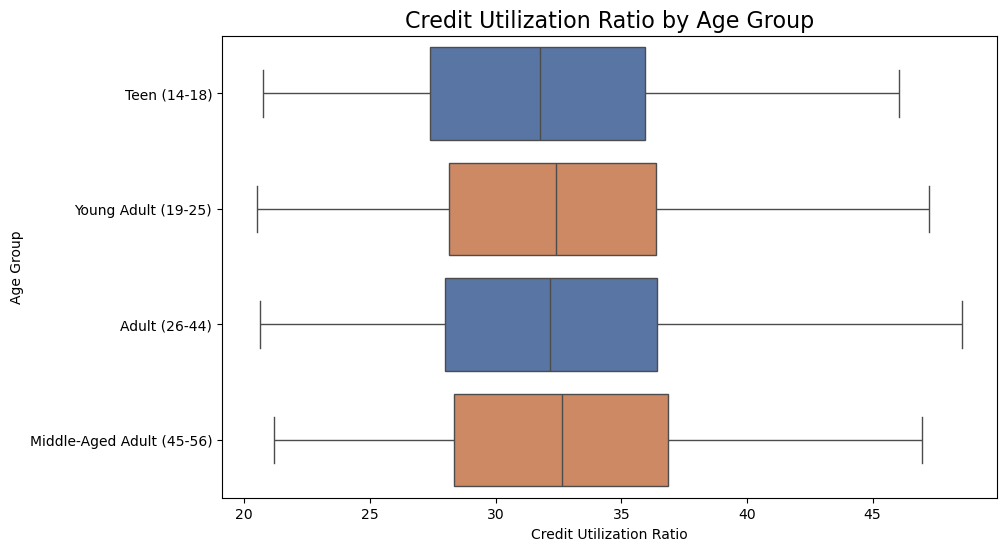

In [85]:
# Create a figure
plt.figure(figsize=(10,6))

# Generate a boxplot
sns.boxplot(data=df, x="Credit_Utilization_Ratio", y="Age_Group", hue='Age_Group', orient='h', palette=["#4C72B0", "#DD8452"], dodge=False, legend=False)

# Set title
plt.title("Credit Utilization Ratio by Age Group", fontsize=16)

# Set x-axis label
plt.xlabel("Credit Utilization Ratio")

# Set y-axis label
plt.ylabel("Age Group")

# Display the figure
plt.show()

### Monthly Balance by Age Group
##### The analysis of the dataset reveals several key financial and demographic relationships. Financially, the Higher Income group maintains a significantly greater Monthly Balance (mean ~ 494.56) compared to the Lower Income group (mean ~ 299.91), and the Higher Income distribution shows much greater spread and higher maximum values. When looking at age, the dataset is dominated by the Adult (25,324 individuals) and Young Adult (9,189 individuals) groups. The income distribution across age shows that while Teens are predominantly Lower Income (1,704 individuals), the Higher Income category becomes dominant from Young Adult (4,989 individuals) through Middle-Aged Adult (4,994 individuals). The Credit Utilization Ratio remains relatively consistent across all age groups, with boxplots indicating similar median and interquartile ranges. However, the Monthly Balance by Age Group plot shows a clear upward trend in median balance from Teen to Middle-Aged Adult, with the latter exhibiting the highest median balance and the greatest presence of high-value outliers.

/var/folders/jr/9ph4ptcn3n9c32zj55z_4whh0000gn/T/ipykernel_81733/1311777394.py:5: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="Monthly_Balance", y="Age_Group", hue="Age_Group", data=df, orient='h', palette=["#4C72B0","#DD8452"], dodge=False, legend=False)


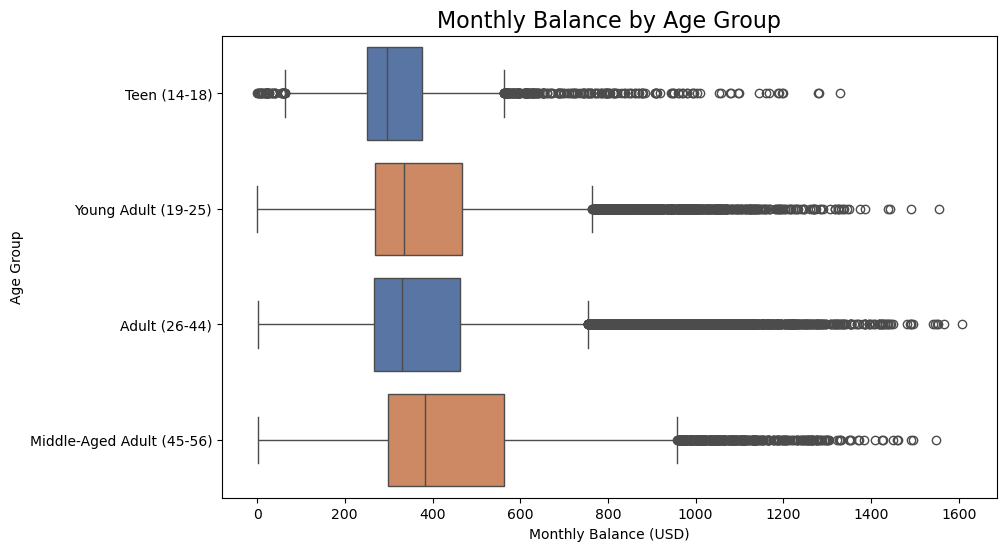

In [86]:
# Create the plot
plt.figure(figsize=(10,6))

# Generate a boxplot
sns.boxplot(x="Monthly_Balance", y="Age_Group", hue="Age_Group", data=df, orient='h', palette=["#4C72B0","#DD8452"], dodge=False, legend=False)

# Set title
plt.title("Monthly Balance by Age Group", fontsize=16) 

# Set x-axis label
plt.xlabel("Monthly Balance (USD)")

# Set y-axis label
plt.ylabel("Age Group")

# Display the plot
plt.show()

## Spending Behavior
#### Technique: Encode Categorical Data
##### 0: '!@9#%8' - NA value
##### 1: 'High_spent_Large_value_payments' - Individual spends a lot overall, but occasionally makes large payments
##### 2: 'High_spent_Medium_value_payments' - Individual spends a lot overall, mostly making medium-sized payments
##### 3: 'High_spent_Small_value_payments' - Individual spends a lot overall, but mostly in small increments
##### 4: 'Low_spent_Large_value_payments' - Individual spends little overall, but occasionally makes large payments
##### 5: 'Low_spent_Medium_value_payments' - Individual spends little overall, mostly making medium-sized payments
##### 6: 'Low_spent_Small_value_payments' - Individual spends little overall, but mostly in small increments

In [87]:
# Convert the 'Payment_Behaviour' column to the 'category' data type
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype('category')

# Create a new column by converting the categorical values into numerical codes
df['Payment_Behaviour_Code'] = df['Payment_Behaviour'].cat.codes

# Create dictionary to decode the numerical codes back to their original label
dict(enumerate(df['Payment_Behaviour'].cat.categories))

{0: '!@9#%8',
 1: 'High_spent_Large_value_payments',
 2: 'High_spent_Medium_value_payments',
 3: 'High_spent_Small_value_payments',
 4: 'Low_spent_Large_value_payments',
 5: 'Low_spent_Medium_value_payments',
 6: 'Low_spent_Small_value_payments'}

### Spending Behavior by Income Group
#### Technique: Perform group operations (Apply)
##### The distribution of Payment Behaviour significantly differs between the Higher Income and Lower Income groups. In the Lower Income group, the two most frequent behaviors are Low_spent_Small_value_payments(8,496 individuals) and Low_spent_Medium_value_payments(3,124 individuals), suggesting a high concentration in these specific spending patterns. Conversely, the Higher Income group is more evenly distributed, with the highest counts observed in High_spent_Medium_value_payments(5,985 individuals), High_spent_Large_value_payments(5,297 individuals), and Low_spent_Small_value_payments(4,198 individuals). Notably, the Lower Income group exhibits an extremely high concentration in Low_spent_Small_value_payments, being more than double the count of the Higher Income group for this specific behavior (8,496 vs. 4,198).

In [88]:
# Group the DataFrame by 'Income_Group' and compute descriptive statistics for the 'Payment_Behaviour_Code' within each group
df.groupby(["Payment_Behaviour_Code", 'Income_Group']).size().unstack()

Income_Group,"Higher Income (>$37,576)","Lower Income (<$37,576)"
Payment_Behaviour_Code,,
0,2012,1788
1,5297,1547
2,5985,2937
3,3003,2648
4,2552,2700
5,3713,3124
6,4198,8496


### Spending Behavior by Age Group
#### Technique: Perform group operations (Apply)
##### The distribution of Payment Behaviour is consistent with the overall age distribution, with the Adult group showing the highest counts for every single behavior due to its dominant population size (25,324 total individuals). Focusing on relative frequencies, the Teen group shows a high count for Low_spent_Small_value_payments(896 individuals) and High_spent_Small_value_payments(1,065 individuals), reflecting distinct spending habits in this youngest cohort. Both the Young Adult and Adult groups show high counts across High_spent_Large_value_payments, High_spent_Medium_value_payments, and Low_spent_Small_value_payments, which likely represent more diversified spending typical of working populations. The Middle-Aged Adult group shows a pattern similar to the Adult group but with a particularly high count for Low_spent_Small_value_payments(1,876 individuals), indicating this specific behavior code is highly prevalent across all age categories.

In [89]:
# Group the DataFrame by 'Age_Group' and compute descriptive statistics for the 'Payment_Behaviour_Code' within each group
df.groupby(["Payment_Behaviour_Code", 'Age_Group']).size().unstack()

/var/folders/jr/9ph4ptcn3n9c32zj55z_4whh0000gn/T/ipykernel_81733/3205519561.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Payment_Behaviour_Code", 'Age_Group']).size().unstack()


Age_Group,Teen (14-18),Young Adult (19-25),Adult (26-44),Middle-Aged Adult (45-56)
Payment_Behaviour_Code,,,,
0,231,685,1913,677
1,328,1230,3418,1329
2,545,1643,4480,1582
3,362,1065,2831,987
4,366,984,2612,886
5,444,1294,3434,1140
6,896,2288,6636,1876


### Monthly Balance by Payment Behaviour
##### The boxplot displays the distribution of Monthly Balance (USD) across six different categories of Payment Behaviour. Generally, the categories indicating "High_spent" tend to have a higher median monthly balance and greater variance compared to the "Low_spent" categories. Specifically, "High_spent_Large_payments" and "High_spent_Medium_payments" show the highest median balances, and numerous high-value outliers extending up to approximately 1600 USD. Conversely, all three "Low_spent" groups exhibit significantly lower and less spread monthly balances, with the "Low_spent_Small_value_payments" category having the lowest median, suggesting a strong positive relationship between the magnitude of spending and the typical monthly account balance.

/var/folders/jr/9ph4ptcn3n9c32zj55z_4whh0000gn/T/ipykernel_81733/1169360712.py:5: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="Monthly_Balance", y="Payment_Behaviour_Code", hue="Payment_Behaviour_Code", data=df, orient='h', palette=["#4C72B0","#DD8452"], dodge=False, legend=False)


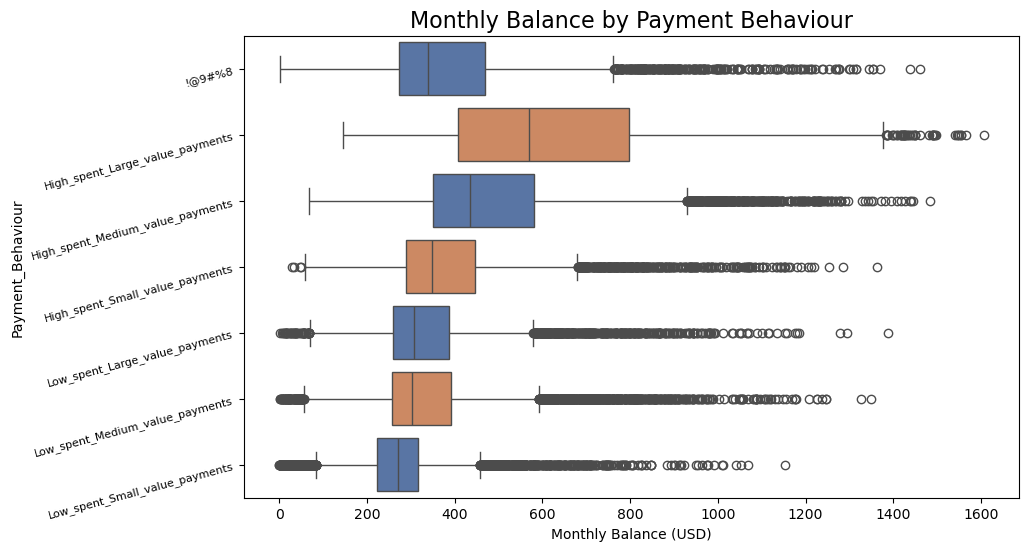

In [90]:
# Create the plot
plt.figure(figsize=(10,6))

# Generate boxplot
sns.boxplot(x="Monthly_Balance", y="Payment_Behaviour_Code", hue="Payment_Behaviour_Code", data=df, orient='h', palette=["#4C72B0","#DD8452"], dodge=False, legend=False)

# Set title
plt.title("Monthly Balance by Payment Behaviour", fontsize=16) 

# Set x-axis label
plt.xlabel("Monthly Balance (USD)")

# Set y-axis label and ticks
plt.ylabel("Payment_Behaviour")
plt.yticks([0, 1, 2, 3, 4, 5, 6], 
           ['!@9#%8', 
            'High_spent_Large_value_payments', 
            'High_spent_Medium_value_payments', 
            'High_spent_Small_value_payments', 
            'Low_spent_Large_value_payments', 
            'Low_spent_Medium_value_payments', 
            'Low_spent_Small_value_payments'],
          rotation=15, fontsize=8)

# Display the plot
plt.show()